## Information Retrieval on Large Volumes of Documents:

Quickly extract specific information or related documents from vast repositories, streamlining data management.

## GenAI Stack Workflow for Knowledge Base Question & Answer

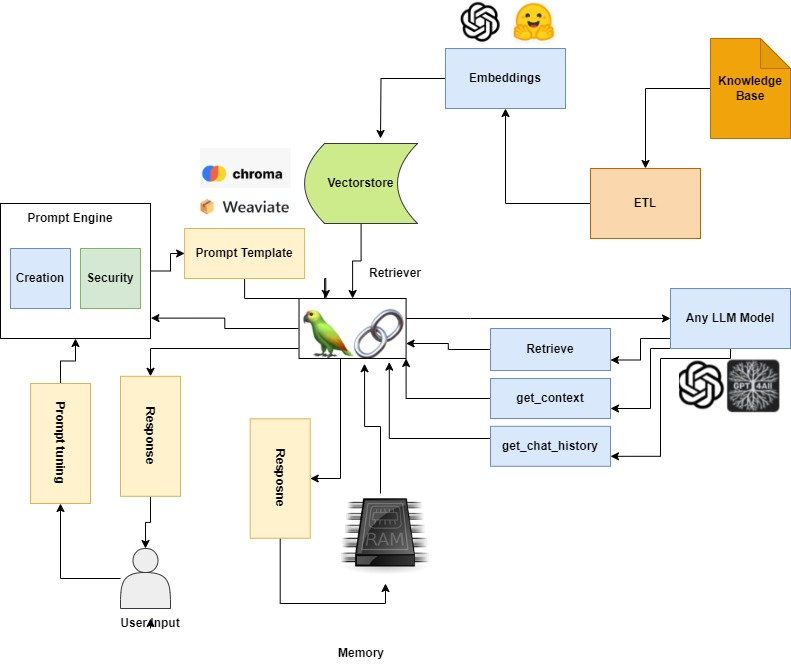

## Installing GenAI Stack version 2

* https://github.com/aiplanethub/genai-stack/releases/tag/0.2.5

In [ ]:
!pip install git+https://github.com/aiplanethub/genai-stack.git@0.2.5

  Cloning https://github.com/aiplanethub/genai-stack.git (to revision 0.2.5) to /tmp/pip-req-build-xf2y4dyr
  Running command git clone --filter=blob:none --quiet https://github.com/aiplanethub/genai-stack.git /tmp/pip-req-build-xf2y4dyr
  Running command git checkout -q e16b6fdb9876085c19c89cfe2c8bff7200203b47
  Resolved https://github.com/aiplanethub/genai-stack.git to commit e16b6fdb9876085c19c89cfe2c8bff7200203b47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for genai_stack: filename=genai_stack-0.2.5-py3-none-any.whl size=107867 sha256=4523c6eceedc00aa5bf723143c5201c3fb5c89d48db0901e4836c379415da62a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0d83uls2/wheels/fd/0c/b0/51754bc8476db274750f251b191809844ee0f54766f2b69266
Successfully built genai_stack
  Attempting uninstall: genai_stack
    Found existing installation: genai-stack 0.2.1
    Uninstalling genai-stack-0.2.1:
  

## Componets used for implementation

* **gpt-3.5-turbo** as LLM
* **Chromadb** as Vectorstore
* **sentence-transformers/all-mpnet-base-v2** sentence transformer for text embeddings
* **Langchain** Framework

## Import Required GenAI Stack Components

In [ ]:
from genai_stack.stack.stack import Stack
from genai_stack.etl.langchain import LangchainETL
from genai_stack.embedding.langchain import LangchainEmbedding
from genai_stack.vectordb.chromadb import ChromaDB
from genai_stack.prompt_engine.engine import PromptEngine
from genai_stack.model.gpt3_5 import OpenAIGpt35Model
from genai_stack.retriever import LangChainRetriever
from genai_stack.memory.langchain import ConversationBufferMemory

## Instantiate ETL component by providing configuration according to source data type.

* Here the input source is .pdf file




In [ ]:
document_path = "/content/learn-how-to-implement-face-recognition-using-opencv-with-python.pdf"
etl = LangchainETL.from_kwargs(name="PyPDFLoader", fields={"file_path": document_path})

## Instantiate the LLM

In [ ]:
import os
from getpass import getpass
api_key = getpass("Enter your openai api key ...")

Enter your openai api key ...··········


In [ ]:
llm = OpenAIGpt35Model.from_kwargs(parameters={"openai_api_key":api_key})

## Instantiate Embedding component using open source Huggingface Model

In [ ]:
config = {
    "model_name": "sentence-transformers/all-mpnet-base-v2",
    "model_kwargs": {"device": "cpu"},
    "encode_kwargs": {"normalize_embeddings": False},
}
embedding = LangchainEmbedding.from_kwargs(name="HuggingFaceEmbeddings", fields=config)

## Instantiate the Vectorstore

In [ ]:
chromadb = ChromaDB.from_kwargs()

## Instantiate the Retriver

In [ ]:
retriever = LangChainRetriever.from_kwargs()

## Instantiate the Promptengine

* prompt engine constructs the prompt template  for instructing the LLM

In [ ]:
promptengine = PromptEngine.from_kwargs(should_validate=False)

## Instantiate Memory

In [ ]:
memory = ConversationBufferMemory.from_kwargs()

## Setup the GenAI Stack

In [ ]:
stack = Stack(
    etl=etl,
    embedding=embedding,
    vectordb=chromadb,
    model=llm,
    prompt_engine=promptengine,
    retriever=retriever,
    memory=memory,
)

## Performing the ETL operations
1. extracting the content
2. transforrmation(creating embeddings),
3. load(storing the knowledge base in  the vectordb)

In [ ]:
etl.run()

## Ask a question

In [ ]:
question = input("Ask a question: ")

Ask a question: What are  various deep learning-based facial recognition algorithms available?


## Response formulated by the GenAI stack

* retiever.get_context : returns matching documents from the vectordb on the question asked

In [ ]:
print(retriever.get_context(question))

NotImplementedError: ignored

* retiever.retrive : returns response generated by the LLM based on the matching context supplied by the retriver to the LLM

In [ ]:
response = retriever.retrieve(question)
print(response['output'])

There are several deep learning-based facial recognition algorithms available. Some popular ones include:

1. VGG-Face: This algorithm uses a deep convolutional neural network (CNN) architecture to extract facial features and perform face recognition.

2. FaceNet: FaceNet is a deep learning model that uses a triplet loss function to learn discriminative features for face recognition. It maps faces into a high-dimensional space where the distance between faces of the same person is minimized, while the distance between faces of different people is maximized.

3. DeepFace: Developed by Facebook, DeepFace is a deep learning model that uses a multi-layer neural network to perform face recognition. It can detect and recognize faces with high accuracy.

4. OpenFace: OpenFace is an open-source deep learning model that uses a combination of deep neural networks and traditional computer vision techniques for face recognition. It can generate face embeddings that can be used for face identificat

* retriever.get_chat_history : returns conversation history from the memory

In [ ]:
print(retriever.get_chat_history({"query":question,"k":1}))

HUMAN : What are  various deep learning-based facial recognition algorithms available?
YOU : There are several deep learning-based facial recognition algorithms available. Some popular ones include:

1. VGG-Face: This algorithm uses a deep convolutional neural network (CNN) architecture to extract facial features and perform face recognition.

2. FaceNet: FaceNet is a deep learning model that uses a triplet loss function to learn discriminative features for face recognition. It maps faces into a high-dimensional space where the distance between faces of the same person is minimized, while the distance between faces of different people is maximized.

3. DeepFace: Developed by Facebook, DeepFace is a deep learning model that uses a multi-layer neural network to perform face recognition. It can detect and recognize faces with high accuracy.

4. OpenFace: OpenFace is an open-source deep learning model that uses a combination of deep neural networks and traditional computer vision technique

## Helper Function to generate response, retrieve matching context and analyze the chat history

In [ ]:
process = "y"
while process == 'y':
  question = input("Ask a question: ")
  print(f"Question : {question}")
  #content = retriever.get_context(question)
  #print("\n")
  #print("Matching Content retrived from vector store : \n")
  #print(content)
  print("\n")
  response = retriever.retrieve(question)
  print(f"Response : {response}")
  print("\n")
  history = retriever.get_chat_history({"query":question,"k":1})
  print("History: \n")
  print(history)
  print("\n\n")
  process =  input("Do you want to continue : y -to continue, n - to exit :")
  print("\n")


Ask a question: What are  various deep learning-based facial recognition algorithms available?
Question : What are  various deep learning-based facial recognition algorithms available?


Response : {'output': 'There are several deep learning-based facial recognition algorithms available. Some popular ones include:\n\n1. VGG-Face: This algorithm uses a deep convolutional neural network (CNN) architecture to extract facial features and perform face recognition.\n\n2. FaceNet: FaceNet is a deep learning model that uses a triplet loss function to learn discriminative features for face recognition. It maps faces into a high-dimensional space where the distance between faces of the same person is minimized, while the distance between faces of different people is maximized.\n\n3. DeepFace: Developed by Facebook, DeepFace is a deep learning model that uses a multi-layer neural network to perform face recognition. It can detect and recognize faces with high accuracy.\n\n4. OpenFace: OpenFace is